# Regression: Model Implementations

This notebook is for the hard coded implementation of the various regression models without using the machine learning libraries like scikit-learn. The goal is to understand the workings of the model and visualise its decision boudary and learning process step by step in each iteration. We will also look into optimisation of these algorithms in this notebook.

Models we will look into are: -

1. **Linear Regression:** fitting linear relationship
* Batch Gradient Descent
* Stochastic Gradient Descent
* Mini-Batch Gradient Descent

2. **Polynomial Regression:** fitting second order curve

3. **Regularised Models:** regularising model (prevent overfitting)
* Ridge Regression
* Lasso Regression
* ElasticNet


# 1. Linear Regression and Gradient Descent


### 1.1 Linear Regression: Batch Gradient Descent

As stated in the theory section batch gradient descent fits the entire dataset on the model in every iteration and uses it to update the value for theta and finding gradients, becuase of this, the method can be very slow however it will converge to optimum result eventually unlike other methods like stochastic and minibatch gradient descent which can bounce around and will stay only in neighborhood of optimum solution.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Lets make some data first

X = np.random.rand(20, 1)
y = X * 2
X.shape, y.shape

((20, 1), (20, 1))

Text(0.5, 0, 'y')

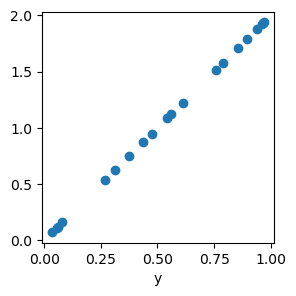

In [10]:
plt.figure(figsize=(3, 3))
plt.scatter(X, y)
plt.xlabel('X')
plt.xlabel('y')

As we can see this is a linear relationship so our model should be able to fit it

In [14]:
# This is our same matrix X but with an added bias term where we are taking bias as X
X_b = np.ones((20, 1))
X_b = np.c_[X_b, X]
X_b

array([[1.        , 0.9663682 ],
       [1.        , 0.89527494],
       [1.        , 0.31155185],
       [1.        , 0.96893341],
       [1.        , 0.93825387],
       [1.        , 0.95952768],
       [1.        , 0.03647644],
       [1.        , 0.4350925 ],
       [1.        , 0.37607371],
       [1.        , 0.26811424],
       [1.        , 0.47367085],
       [1.        , 0.08062142],
       [1.        , 0.54159735],
       [1.        , 0.55934346],
       [1.        , 0.85462944],
       [1.        , 0.75735083],
       [1.        , 0.05537161],
       [1.        , 0.61122913],
       [1.        , 0.06141848],
       [1.        , 0.78817972]])

In [55]:
# Now we implement batch gradient descent

# Initial weights

theta = np.random.rand(2, 1)

# Initialising learning rate
eta = 0.1

# m is number of features
m = 20

# Solving using 100 iterations

for i in range(0, 300):
    # This is batch gradient descent as we are using the entire X dataset (X_b with bias) while training at each step
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - gradients * eta

print(theta)

[[0.00520046]
 [1.99125805]]


Lets now plot the predictions using the value of theta we have calculated and the actual values

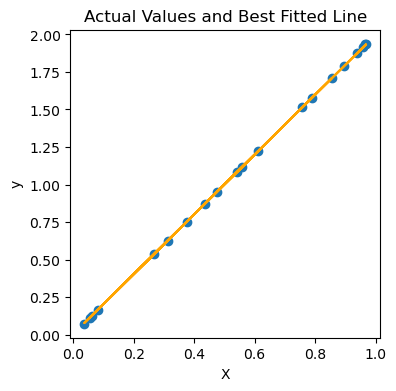

In [56]:
y_preds = X_b.dot(theta)
plt.figure(figsize=(4, 4))
plt.scatter(X, y)
plt.plot(X, y_preds, color='orange')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Actual Values and Best Fitted Line')
plt.show()

We can see that the line is fitting perfect usually there would be some noise in the dataset but in this scenario by changing the number of epochs we can get a good result

### 1.1 Linear Regression: Stochastic Gradient Descent

In stochastic gradient descent in each iteration we only use one training example to update gradients and weights, the advantage is it is much faster however once it starts to reach optimum result it will keep bouncing around this can become an issue, it can be solved by reducing the learning rate as we reach the optimum solution

In [95]:
# We can use the same values of X, y and X_b

theta = np.random.rand(2, 1)
eta = 0.1
t0, t1 = 5, 50

for i in range(0, 100):
    for j in range(m):
        random_index = np.random.randint(m)
        X_i = X_b[random_index: random_index+1]
        y_i = y[random_index: random_index+1]
        gradients = 2 * X_i.T.dot(X_i.dot(theta) - y_i)
        t = j * m + i
        eta = t0 / (t + t1)
        theta = theta - eta * gradients
    
print(theta)

[[6.29072073e-04]
 [1.99893894e+00]]


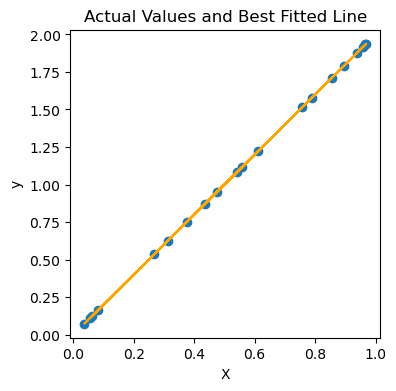

In [96]:
y_preds = X_b.dot(theta)
plt.figure(figsize=(4, 4))
plt.scatter(X, y)
plt.plot(X, y_preds, color='orange')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Actual Values and Best Fitted Line')
plt.show()

### 1.1 Linear Regression: Mini-batch Gradient Descent

Mini-batch gradient descent is simply a combination of batch gradient descent and stochastic gradient descent. In mini-batch gradient descent we will take small random subsets of the dataset and use it to train on each step. It has similar advantages and disadvantages to stochastic gradient descent being that it keeps bouncing around on reaching neighborhood of optimal solution

In [79]:
random_indices = np.random.choice(X_b.shape[0], 2, replace=False)

array([[0.11074323],
       [1.91905537]])

In [97]:
theta = np.random.rand(2, 1)

t0, t1 = 5, 50

batch_size = 3

for i in range(0, 30):
    for j in range(m):
        random_indices = np.random.choice(X_b.shape[0], 2, replace=False)
        X_i = X_b[random_indices]
        y_i = y[random_indices]
        gradients = X_i.T.dot(X_i.dot(theta) - y_i)
        t = i * m + j
        eta = t0 / (t + t1)
        theta = theta - eta * gradients

print(theta)

[[0.11102544]
 [1.81193585]]


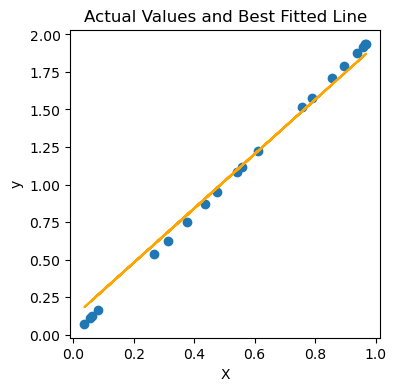

In [94]:
y_preds = X_b.dot(theta)
plt.figure(figsize=(4, 4))
plt.scatter(X, y)
plt.plot(X, y_preds, color='orange')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Actual Values and Best Fitted Line')
plt.show()

As we can see we have taken much few iterations (epochs) to reach an approximate result in both mini batch and stochastic as compared to batch gradient descent. Unlike batch gradient descent these can be used for online learning as well since they learn one instance at a time (or batches of them - mini batch).

Lets now take a look at how error reduces iteration wise in batch, mini-batch and stochastic gradient descent

### 1.4 Comparing Gradient Descent Methods

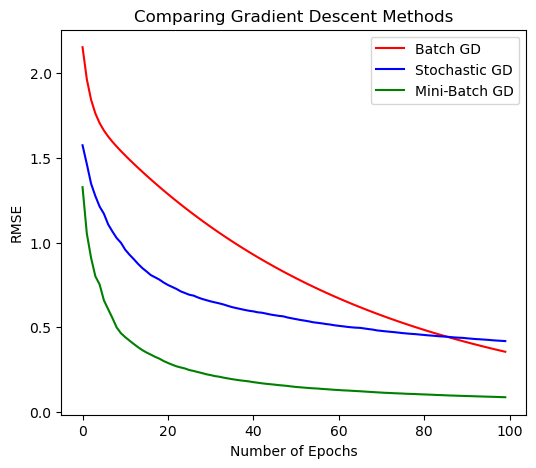

In [106]:
def rmse(y_true, y_preds):
    return (np.sum((y_true - y_preds) ** 2)) ** 0.5

def batch_descent(theta, n_iterations=100):
    eta = 0.1
    m = 20
    epoch_errors = []

    for epoch in range(n_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        y_preds = X_b.dot(theta)
        error = rmse(y, y_preds)
        epoch_errors.append(error)

    return epoch_errors
        

def stochastic_descent(theta, n_iterations=100):
    t0, t1 = 5, 50
    m = 20
    epoch_errors = []

    for epoch in range(n_iterations):
        for i in range(m):
            random_index = np.random.randint(m)
            X_i = X_b[random_index:random_index+1]
            y_i = y[random_index:random_index+1]
            gradients = X_i.T.dot(X_i.dot(theta) - y_i)
            t = epoch * m + i
            eta = t0 / (t + t1)
            theta = theta - gradients * eta
        
        y_preds = X_b.dot(theta)
        error = rmse(y, y_preds)
        epoch_errors.append(error)
    
    return epoch_errors

def minibatch_descent(theta, n_iterations=100):
    t0, t1 = 5, 50
    m = 20
    epoch_errors = []

    for epoch in range(n_iterations):
        for i in range(m):
            random_indexes = np.random.choice(X_b.shape[0], 2, replace=False)
            X_i = X_b[random_indexes]
            y_i = y[random_indexes]
            gradients = X_i.T.dot(X_i.dot(theta) - y_i)
            t = epoch * m + i
            eta = t0 / (t + t1)
            theta = theta - gradients * eta
        
        y_preds = X_b.dot(theta)
        error = rmse(y, y_preds)
        epoch_errors.append(error)
    
    return epoch_errors


# Initialise same weights for all

theta = np.random.rand(2, 1)
batch_errors = batch_descent(theta[:], 100)
stoch_errors = stochastic_descent(theta[:], 100)
mbatch_errors = minibatch_descent(theta[:], 100)

plt.figure(figsize=(6, 5))
plt.plot(batch_errors, color='red', label='Batch GD')
plt.plot(stoch_errors, color='blue', label='Stochastic GD')
plt.plot(mbatch_errors, color='green', label='Mini-Batch GD')
plt.legend()
plt.xlabel('Number of Epochs')
plt.ylabel('RMSE')
plt.title('Comparing Gradient Descent Methods')
plt.show()

As we can see batch GD takes much longer to get acceptable margin of error as compared to other methods and mini-batch performs the best at around 40 epochs it starts to plateau while stochastic plateaus early but has greater error rate.